### Погрешности 

In [9]:
# random fault of the slope
def RR(i, v):
    s1 = s2 = 0
    for index in range(1, len(i) + 1):
        s1+=i[index]*v[index]
        s2+=i[index]**2
    return s1/s2

def random_fault(i, v, n):
    s1 = s2 = 0
    for index in range(1, len(i) + 1):
        s1+=v[index]**2
        s2+=i[index]**2
    return ((1/(n-1))*(s1/s2 - (RR(i, v))**2))**0.5
        
    

In [10]:

def sistematic_fault(i, v, delta_i, delta_v):
    return RR(i, v)*((delta_v/max(v))**2 + (delta_i/max(i))**2)**0.5

In [11]:
def full_fault(sist_fault, rand_fault):
    return (sist_fault**2 + rand_fault**2)**0.5

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
n = 7

table1 = pd.DataFrame({
                        'Uv, mV': [5*61, 5*73.5, 5*79.5, 5*86, 5*92, 5*97, 5*104],
                        'Ia, mA': [147.7, 178.74, 193, 208.45, 223.45, 236.83, 252.8],},  index= [1, 2, 3, 4, 5, 6, 7])
table1

,"Uv, mV","Ia, mA"
1,305.0,147.70
2,367.5,178.74
3,397.5,193.00
4,430.0,208.45
5,460.0,223.45
6,485.0,236.83
7,520.0,252.80


In [13]:
x = table1['Ia, mA']
y = table1['Uv, mV']
model1 = np.polyfit(x, y, 1)
R1 = model1[0]

In [17]:
print("R1 = ", R1)
RR1 = RR(x, y)
print("RR1 = ", RR1)
model1

R1 =  2.040468365183917
RR1 =  2.0572037989115546


array([2.04046837, 3.53518569])

In [18]:
rand_fault1 = random_fault(x, y, n)
sist_fault1 = sistematic_fault(x, y, xerr, yerr)
full_fault1 = full_fault(sist_fault1, rand_fault1)

In [19]:
print("random_fualt1 = ", rand_fault1)
print("sistematic_fault1 = ", sist_fault1)
print("full_fault1 = ", full_fault1)

random_fualt1 =  0.0020849007860814675
sistematic_fault1 =  0.010694648223225862
full_fault1 =  0.01089597686792475


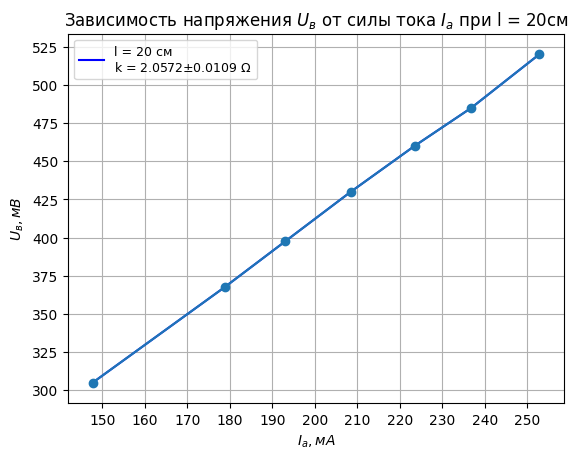

In [20]:

plt.yticks(np.arange(0, 750, 25))
plt.xticks(np.arange(0,  400, 10))

xerr = 0.5
yerr = 2.5
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o-', ecolor='red')

plt.plot(x, y, label = "l = 20 см\nk = " + str(round(RR1, 4)) + "$\pm$" + str(round(full_fault1, 4)) + " $\Omega$", color = 'blue')
plt.xlabel(r'$I_а, мА$')
plt.ylabel(r'$U_в, мВ$')
plt.grid(True)
plt.legend(loc='best', fontsize=9)

plt.title(r'Зависимость напряжения $U_в$ от силы тока $I_а$ при l = 20см')
plt.show()

### Таблица №2
#### Зависимость напряжения от силы тока при l = 30cm

In [23]:
table2 = pd.DataFrame({
                        'Uv, mV': [88, 97, 106.5, 115, 124, 132.5, 141.5],
                        'Ia, mA': [144.47, 159.48, 174.55, 187.95, 203.5, 217.13, 232.17],},  index= [1, 2, 3, 4, 5, 6, 7])

for i in range(1, n + 1):
    table2['Uv, mV'][i] =table2['Uv, mV'][i]*5
table2

,"Uv, mV","Ia, mA"
1,440.0,144.47
2,485.0,159.48
3,532.5,174.55
4,575.0,187.95
5,620.0,203.50
6,662.5,217.13
7,707.5,232.17


In [25]:
x2 = table2['Ia, mA']
y2 = table2['Uv, mV']
model2 = np.polyfit(x2, y2, 1)

In [26]:
print("R2 = ", model2[0])
RR2 = RR(x2, y2)
print("RR2 = ", RR2)
model2

R2 =  3.0561298000466217
RR2 =  3.0492450514766243


array([ 3.0561298 , -1.32846267])

In [34]:
rand_fault2 = random_fault(x2, y2, n)
sist_fault2 = sistematic_fault(x2, y2, xerr, yerr)
full_fault2 = full_fault(sist_fault2, rand_fault2)
print("rand_fault2 = ", rand_fault2)
print("sist_fault2 = ", sist_fault2)
print("full_fault2 = ", full_fault2)

rand_fault2 =  0.0020219617671753914
sist_fault2 =  0.01744523016636513
full_fault2 =  0.01756201540101178


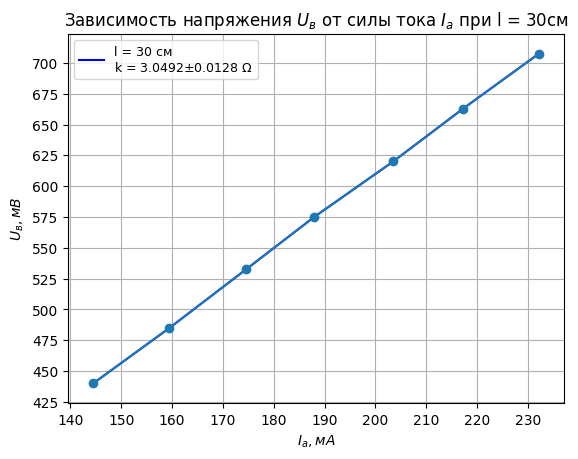

In [28]:


xerr = 0.5
yerr = 2.5

plt.yticks(np.arange(0, 750, 25))
plt.xticks(np.arange(0, 400, 10))
plt.errorbar(x2, y2, xerr=xerr, yerr=yerr, fmt='o-', ecolor='red')

plt.plot(x2, y2, label = "l = 30 см\nk = " + str(round(RR2, 4)) + "$\pm$" + str(round(full_fault2, 4)) + " $\Omega$", color = 'blue')
plt.xlabel(r'$I_а, мА$')
plt.ylabel(r'$U_в, мВ$')
plt.legend(loc='best', fontsize=9)
plt.grid(True)


plt.title(r'Зависимость напряжения $U_в$ от силы тока $I_а$ при l = 30см')
plt.show()

### Таблица 3
#### Зависимость напряжения от силы тока при l = 50cm

In [29]:
table3 = pd.DataFrame({
                        'Uv, mV': [21.5, 32.5, 43, 68, 82.5, 97, 109.5],
                        'Ia, mA': [21.42, 32.2, 42.8, 67.8, 82, 96.58, 109.12],},  index= [1, 2, 3, 4, 5, 6, 7])

for i in range(1, n + 1):
    table3['Uv, mV'][i] =table3['Uv, mV'][i]*5
    
table3

,"Uv, mV","Ia, mA"
1,107.5,21.42
2,162.5,32.20
3,215.0,42.80
4,340.0,67.80
5,412.5,82.00
6,485.0,96.58
7,547.5,109.12


In [30]:
x3 = table3['Ia, mA']
y3 = table3['Uv, mV']
model3 = np.polyfit(x3, y3, 1)

In [31]:
print("R3 = ", model3[0])
RR3 = RR(x3, y3)
print("RR3 = ", RR3)
model3

R3 =  5.016577579014476
RR3 =  5.021810034862212


array([5.01657758, 0.41546578])

In [35]:
rand_fault3 = random_fault(x3, y3, n)
sist_fault3 = sistematic_fault(x3, y3, xerr, yerr)
full_fault3 = full_fault(sist_fault3, rand_fault3)
print("rand_fault3 = ", rand_fault3)
print("sist_fault3 = ", sist_fault3)
print("full_fault3 = ", full_fault3)

rand_fault3 =  0.002735572753624397
sist_fault3 =  0.041383146357346384
full_fault3 =  0.0414734633316766


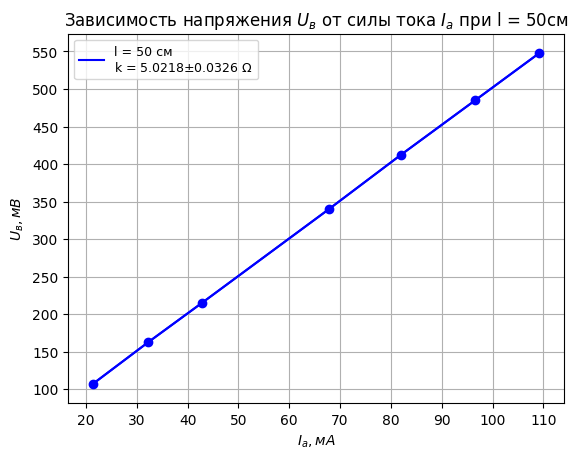

In [33]:


xerr = 0.5
yerr = 3.75

plt.yticks(np.arange(0, 750, 50))
plt.xticks(np.arange(0, 200, 10))
plt.errorbar(x3, y3, xerr=xerr, yerr=yerr, fmt='o-', color='blue')
plt.plot(x3, y3, label = "l = 50 см\nk = " + str(round(RR3, 4)) + "$\pm$" + str(round(full_fault3, 4)) + " $\Omega$", color = 'blue')

plt.legend(loc='best', fontsize=9)
plt.xlabel(r'$I_а, мА$')
plt.ylabel(r'$U_в, мВ$')
plt.grid(True)

plt.title(r'Зависимость напряжения $U_в$ от силы тока '+ r'$I_а$' + r' при l = 50см')
plt.show()

### удельное сопротивление 

In [44]:
full_d_fault = 0.01 * 0.001
d = 0.325 * 0.001
l_fault = 0.2 * 0.01
l1 = 0.2
l2 = 0.3
l3 = 0.5
ro_const = 3.14 * (d**2)/4

In [45]:
def resistance_fault(full_fault, RR, lx):
    return (ro_const/lx) * ((full_fault)**2 + (2*RR*full_d_fault/d)**2 + (RR*full_fault/lx)**2)**0.5

In [49]:
print("resistance1_fault = ", resistance_fault(full_fault1, RR1, l1))
print("resistance1 = ", RR1*ro_const/l1)
print("resistance2_fault = ", resistance_fault(full_fault2, RR2, l2))
print("resistance2 = ", RR2*ro_const/l2)
print("resistance3_fault = ", resistance_fault(full_fault3, RR3, l3))
print("resistance3 = ", RR3*ro_const/l3)

resistance1_fault =  7.024211578275237e-08
resistance1 =  8.528716936956296e-07
resistance2_fault =  7.174461631323385e-08
resistance2 =  8.427668640711385e-07
resistance3_fault =  8.62850142997296e-08
resistance3 =  8.327730353437444e-07
